## On-Off Gaussian Processes

In [1]:
from OnOffSVGP import OnOffSVGP
from GaussianLikelihoodWithUncertainMean import GaussianLikelihoodWithUncertainMean
from PlotOnOff import PlotOnOff

In [2]:
import GPflow as gpf
import tensorflow as tf
import time
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

### 01. Motorcycle dataset

In [3]:
motorcycledata = pd.read_csv('../../data/motorcycle/motorcycledata.csv')
Xtrain = motorcycledata['x'].values.reshape(133,1)
Ytrain = motorcycledata['y'].values.reshape(133,1)

In [4]:
# kernel parameters
kf = gpf.kernels.RBF(1)
kf.lengthscales = 5
kf.variance = 20

kg = gpf.kernels.RBF(1)
kg.lengthscales = 10
kg.variance = 5.

In [5]:
# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),7,endpoint=False),0).transpose()
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),7,endpoint=False),0).transpose()
Zf = Zf.reshape(Zf.shape[0],1)
Zg = Zg.reshape(Zg.shape[0],1)

In [6]:
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = GaussianLikelihoodWithUncertainMean()
              ,Zf = Zf,Zg = Zg
              ,whiten = True
             )

In [7]:
# fix the model noise term
m.likelihood.variance = 5
m.likelihood.variance.fixed = False

# fix locations of inducing points
# m.Zf.fixed = True
# m.Zg.fixed = True

In [8]:
m.optimize(maxiter = 5000)
m.compute_log_likelihood()

-620.32359755388632

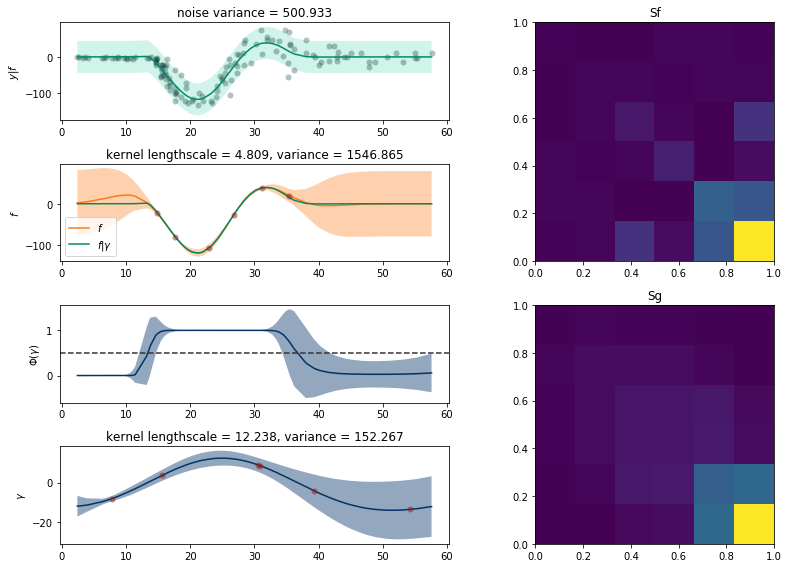

In [9]:
# model plot
PlotOnOff(m)

### 02. Simulated test cases

### test case 01

Gamma is fast shifting, the numpy optimizer fails. 

In [58]:
# load data
matdata = sio.loadmat('../../data/toydata/toydata1.mat')
Xtrain = matdata['x']
Ytrain = matdata['y']

# kernel parameters
kf = gpf.kernels.RBF(1)
kf.lengthscales = 1.
kf.variance = 1.

kg = gpf.kernels.RBF(1)
kg.lengthscales = 0.05
kg.variance = 5.

# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),22,endpoint=False),0).transpose()
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),22,endpoint=False),0).transpose()
Zf = Zf.reshape(Zf.shape[0],1)
Zg = Zg.reshape(Zg.shape[0],1)

In [23]:
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = GaussianLikelihoodWithUncertainMean()
              ,Zf = Zf,Zg = Zg
              ,whiten = True
             )

# fix the model noise term
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = False


In [24]:
m.optimize(maxiter = 10000)
m.compute_log_likelihood()

-686.55148119606451

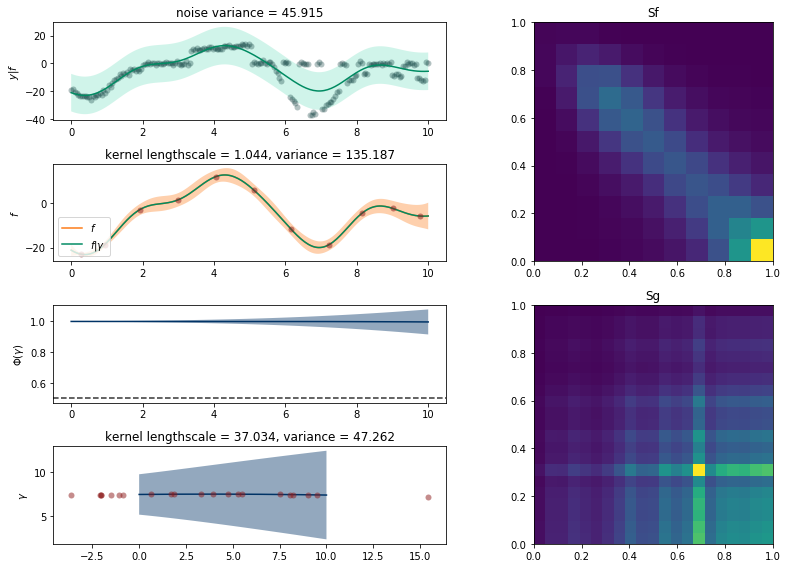

In [25]:
# model plot
PlotOnOff(m)

In [28]:
del m

Matrix inversion of Kgmm poses a problem in this case, because of numpy precision. Try tensorflow optimization

In [53]:
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = GaussianLikelihoodWithUncertainMean()
              ,Zf = Zf,Zg = Zg
              ,whiten = True
             )

# fix the model noise term
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = False


In [56]:
m.optimize(method=tf.train.AdamOptimizer(), maxiter=80000)
m.compute_log_likelihood()

-1542.7284043894988

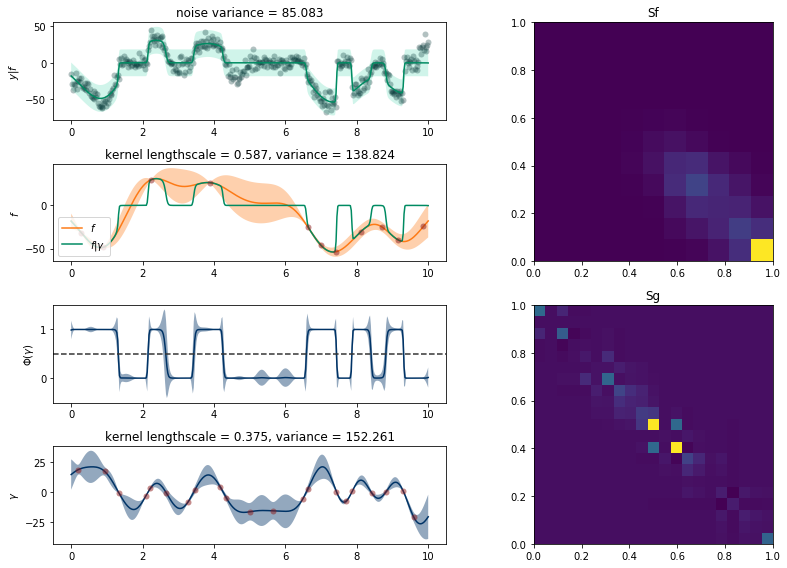

In [57]:
# model plot
PlotOnOff(m)

In [62]:
del m

Looks like the inducing points for f are not able to support the underlying function. Try increasing the number of inducing points.

In [63]:
# load data
matdata = sio.loadmat('../../data/toydata/toydata1.mat')
Xtrain = matdata['x']
Ytrain = matdata['y']

# kernel parameters
kf = gpf.kernels.RBF(1)
kf.lengthscales = 1.
kf.variance = 1.

kg = gpf.kernels.RBF(1)
kg.lengthscales = 0.05
kg.variance = 5.

# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),22,endpoint=False),0).transpose()
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),22,endpoint=False),0).transpose()
Zf = Zf.reshape(Zf.shape[0],1)
Zg = Zg.reshape(Zg.shape[0],1)

In [64]:
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = GaussianLikelihoodWithUncertainMean()
              ,Zf = Zf,Zg = Zg
              ,whiten = True
             )

# fix the model noise term
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = False


In [71]:
m.optimize(method=tf.train.AdamOptimizer(), maxiter=80000)
m.compute_log_likelihood()

-619.57849063626611

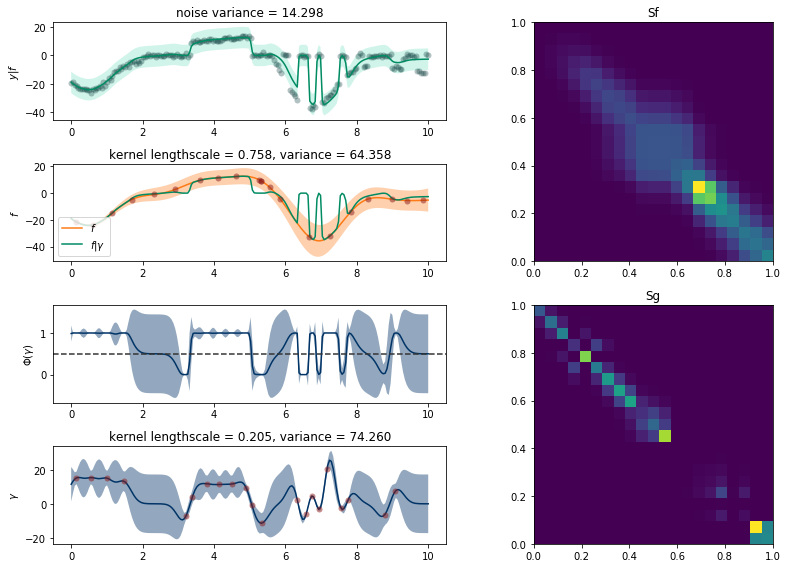

In [70]:
# model plot
PlotOnOff(m)

### test case 02

In [38]:
# load data
matdata = sio.loadmat('../../data/toydata/toydata2.mat')
Xtrain = matdata['x']
Ytrain = matdata['y']

# kernel parameters
kf = gpf.kernels.RBF(1)
kf.lengthscales = 1.
kf.variance = 1.

kg = gpf.kernels.RBF(1)
kg.lengthscales = 0.05
kg.variance = 5.

# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),12,endpoint=False),0).transpose()
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),22,endpoint=False),0).transpose()
Zf = Zf.reshape(Zf.shape[0],1)
Zg = Zg.reshape(Zg.shape[0],1)

In [39]:
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = GaussianLikelihoodWithUncertainMean()
              ,Zf = Zf,Zg = Zg
              ,whiten = True
             )

# fix the model noise term
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = False


In [40]:
m.optimize(maxiter = 10000)
m.compute_log_likelihood()

-1224.6438559700591

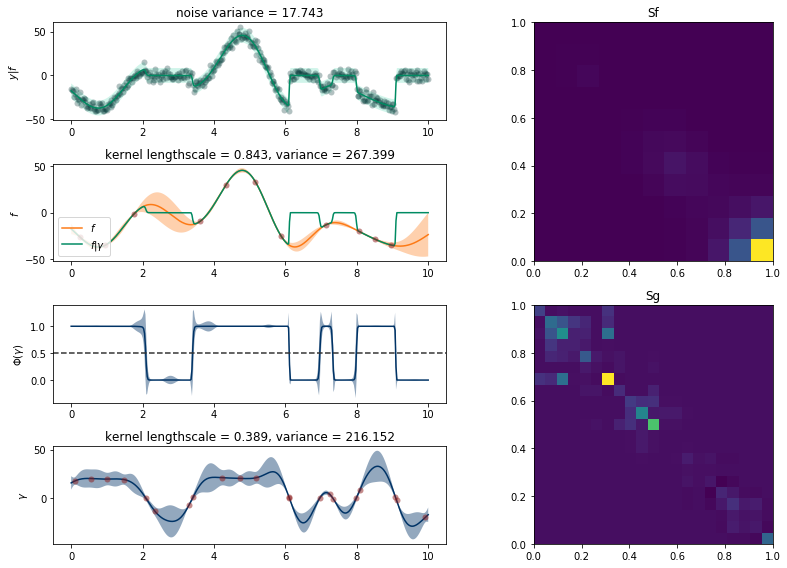

In [41]:
# model plot
PlotOnOff(m)

In [72]:
del m

### test case 03

In [73]:
# load data
matdata = sio.loadmat('../../data/toydata/toydata4.mat')
Xtrain = matdata['x']
Ytrain = matdata['y']

# kernel parameters
kf = gpf.kernels.RBF(1)
kf.lengthscales = 1.
kf.variance = 1.

kg = gpf.kernels.RBF(1)
kg.lengthscales = 0.05
kg.variance = 5.

# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),22,endpoint=False),0).transpose()
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),22,endpoint=False),0).transpose()
Zf = Zf.reshape(Zf.shape[0],1)
Zg = Zg.reshape(Zg.shape[0],1)

In [74]:
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = GaussianLikelihoodWithUncertainMean()
              ,Zf = Zf,Zg = Zg
              ,whiten = True
             )

# fix the model noise term
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = False


In [75]:
# m.optimize(maxiter = 10000)
m.optimize(method=tf.train.AdamOptimizer(), maxiter=50000)
m.compute_log_likelihood()

-1658.3373522641407

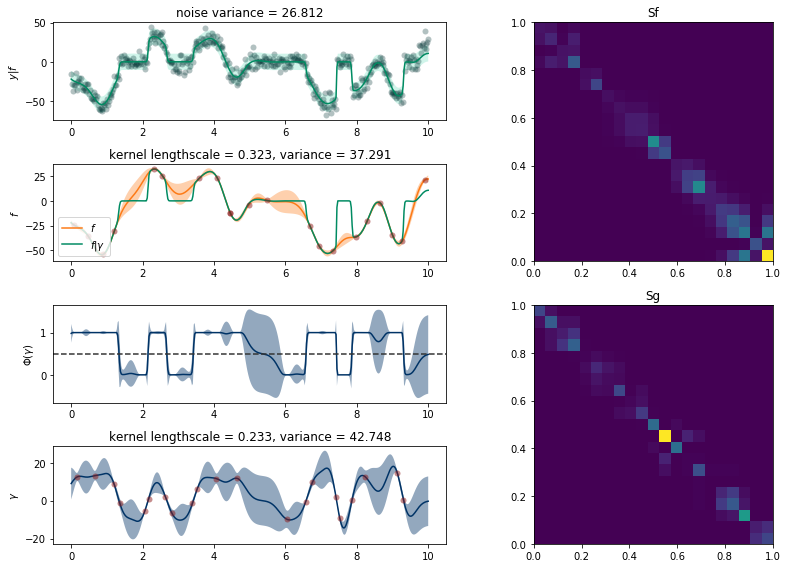

In [76]:
# model plot
PlotOnOff(m)

In [81]:
del m

### test case 04

In [87]:
# load data
matdata = sio.loadmat('../../data/toydata/toydata5.mat')
Xtrain = matdata['x']
Ytrain = matdata['y']

# kernel parameters
kf = gpf.kernels.RBF(1)
kf.lengthscales = 1.
kf.variance = 1.

kg = gpf.kernels.RBF(1)
kg.lengthscales = 0.05
kg.variance = 5.

# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),32,endpoint=False),0).transpose()
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),32,endpoint=False),0).transpose()
Zf = Zf.reshape(Zf.shape[0],1)
Zg = Zg.reshape(Zg.shape[0],1)

In [88]:
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = GaussianLikelihoodWithUncertainMean()
              ,Zf = Zf,Zg = Zg
              ,whiten = True
             )

# fix the model noise term
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = False


In [89]:
# m.optimize(maxiter = 10000)
m.optimize(method=tf.train.AdamOptimizer(), maxiter=50000)
m.compute_log_likelihood()

-1588.4695116056596

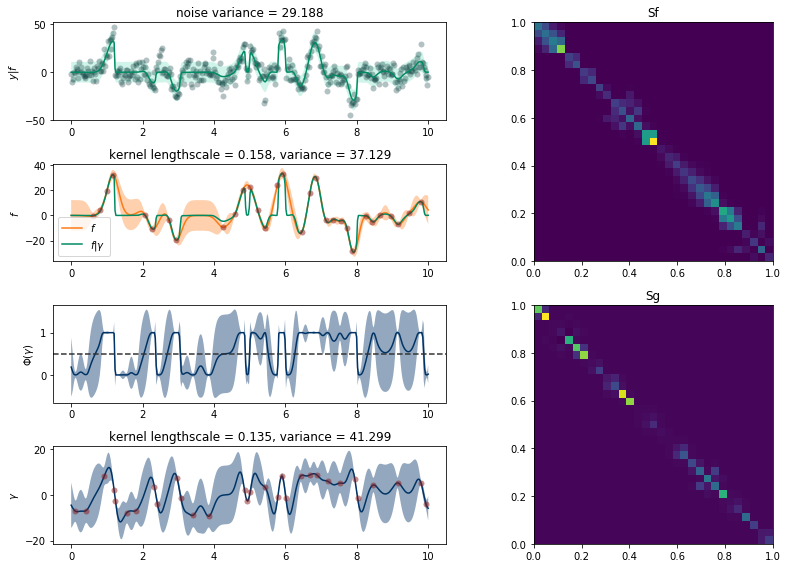

In [90]:
# model plot
PlotOnOff(m)

In [77]:
del m